In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [0]:
train_df= pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/train.p')

In [0]:
test_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/test.p')

In [0]:
val_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/valid.p')

In [58]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
X_train, y_train = train_df['features'], train_df['labels']
X_test, y_test = test_df['features'], test_df['labels']
X_val, y_val = val_df['features'], val_df['labels']


In [70]:
print(X_train[34798][31][31])

[57 68 80]


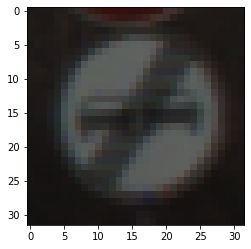

41


In [72]:
img_index = 25
plt.imshow(X_train[img_index,:,:,:])
plt.show()
print(y_train[img_index])

In [86]:
X_train.shape[3]

3

In [0]:
from sklearn.utils import shuffle
X_train = X_train.reshape(X_train.shape[1]*X_train.shape[2]*X_train.shape[3],X_train.shape[0]).T
y_train = y_train.reshape(y_train.shape[0],)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [0]:
X_test = X_test.reshape(X_test.shape[1]*X_test.shape[2]*X_test.shape[3],X_test.shape[0]).T


In [0]:
from fastai.vision import ImageDataBunch, get_transforms, cnn_learner
from fastai.vision.data import imagenet_stats
from fastai.vision.models import resnet34
from fastai.vision.learner import ClassificationInterpretation
from fastai.metrics import error_rate

In [88]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
y_test1 = knn.predict(X_test)

In [91]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_test1))

Accuracy: 0.037450514647664294


In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [19]:
import csv
train_df = readTrafficSigns('/content/drive/My Drive/traffic_sign_classification/train.p')

NotADirectoryError: ignored

Downside- KNN not meant for large datasets, took lot of time for predicting output

# References:
- https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
- https://github.com/mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow/blob/master/Traffic_Sign_Classifier.ipynb